In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn import metrics
from scipy.optimize import minimize

In [33]:
def generate_samples(n, mean1, mean2, mean3, mean4, cov, p1, p2):
    rng = np.random.default_rng()
    
    size1a = p1 * n / 2
    size1b = p1 * n / 2
    size2a = p2 * n / 2
    size2b = p2 * n / 2 
    
    
    data1a = rng.multivariate_normal(mean = mean1, cov = cov, size = int(size1a))
    data1b = rng.multivariate_normal(mean = mean2, cov = cov, size = int(size1b))
    data2a = rng.multivariate_normal(mean = mean3, cov = cov, size = int(size2a))
    data2b = rng.multivariate_normal(mean = mean4, cov = cov, size = int(size2b))
    
    data1a = pd.DataFrame(data1a, columns = ['x1', 'x2'])
    data1b = pd.DataFrame(data1b, columns = ['x1', 'x2'])
    data2a = pd.DataFrame(data2a, columns = ['x1', 'x2'])
    data2b = pd.DataFrame(data2b, columns = ['x1', 'x2'])
    
    data1a['label'] = 0
    data1b['label'] = 0
    data2a['label'] = 1
    data2b['label'] = 1
    samples = pd.concat([data1a, data1b, data2a, data2b], ignore_index=True)
    return samples

In [34]:
def write_data(samples, path):
    """Writes the sample data to the file path provided.

    Args:
        samples (pandas.DataFrame): the sample data
        path (string): the path to the file containing sample data
    """
    samples.to_csv(path, sep=',', header=True, index=True)


In [35]:
def generate_datasets(mean1, mean2, mean3, mean4, cov, p0, p1):
    """Generates 4 samples. 1 with 20 samples. 1 with 200 samples. 1 with 2000 samples. 1 with 10000 samples.
    """
    d20 = generate_samples(20, mean1, mean2, mean3, mean4, cov, p0, p1)
    # write_data(d20, r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train20.csv')
    d20.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train20.csv', sep=',', header=True, index=True)


    d200 = generate_samples(200, mean1, mean2, mean3, mean4, cov, p0, p1)
    # write_data(d200, r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train200.csv')
    d200.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train200.csv', sep=',', header=True, index=True)
    
    d2000 = generate_samples(2000, mean1, mean2, mean3, mean4, cov, p0, p1)
    # write_data(d2000, r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train2k.csv')
    d2000.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train2000.csv', sep=',', header=True, index=True)
   
    d10000 = generate_samples(10000, mean1, mean2, mean3, mean4, cov, p0, p1)
    # write_data(d10000, r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\validate10k.csv')
    d10000.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\validate10000.csv', sep=',', header=True, index=True)
    


    # Common settings for all plots
    marker_type = 'o'  # Circle marker
    color_map = 'coolwarm'  # Viridis color map

    # Plot for d20
    plt.figure(figsize=(8, 6))
    plt.scatter(d20['x1'], d20['x2'], c=d20['label'], cmap=color_map, marker=marker_type, edgecolor='w', alpha=0.6)
    plt.title('Dataset with 20 Points')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Labels')
    
    plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\Dataset with 20 Points.png')
    plt.show()


    # Plot for d200
    plt.figure(figsize=(8, 6))
    plt.scatter(d200['x1'], d200['x2'], c=d200['label'], cmap=color_map, marker=marker_type, edgecolor='w', alpha=0.6)
    plt.title('Dataset with 200 Points')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Labels')
    plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\Dataset with 200 Points.png')
    plt.show()

    # Plot for d2000
    plt.figure(figsize=(8, 6))
    plt.scatter(d2000['x1'], d2000['x2'], c=d2000['label'], cmap=color_map, marker=marker_type, edgecolor='w', alpha=0.6)
    plt.title('Dataset with 2000 Points')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Labels')
    plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\Dataset with 2000 Points.png')
    plt.show()


    # Plot for d10000
    plt.figure(figsize=(8, 6))
    plt.scatter(d10000['x1'], d10000['x2'], c=d10000['label'], cmap=color_map, marker=marker_type, edgecolor='w', alpha=0.6)
    plt.title('Dataset with 10000 Points')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Tags')
    
    plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\Dataset with 10000 Points.png')
    plt.show()


In [36]:
def discriminant(sample, mean01, mean02, mean11, mean12, cov, p0, p1):
    """
    Calculates the discriminant function for a given input vector x, means, covariance matrix, and prior probabilities.

    Args:
        x (numpy.ndarray): Input vector of shape (n_features,).
        mean01 (numpy.ndarray): Mean vector of class 0 for feature 1, of shape (n_features,).
        mean02 (numpy.ndarray): Mean vector of class 0 for feature 2, of shape (n_features,).
        mean11 (numpy.ndarray): Mean vector of class 1 for feature 1, of shape (n_features,).
        mean12 (numpy.ndarray): Mean vector of class 1 for feature 2, of shape (n_features,).
        cov (numpy.ndarray): Covariance matrix of shape (n_features, n_features).
        p0 (float): Prior probability of class 0.
        p1 (float): Prior probability of class 1.

    Returns:
        float: The value of the discriminant function for the given input vector x.
    """
    x = sample[['x1', 'x2']].to_numpy()
    
    pdf_0 = 1/2 * multivariate_normal.pdf(x, mean01, cov) + 1/2 * multivariate_normal.pdf(x, mean02, cov)
    pdf_1 = 1/2 * multivariate_normal.pdf(x, mean11, cov) + 1/2 * multivariate_normal.pdf(x, mean12, cov)
    
    g1 = p1 * pdf_1
    g0 = p0 * pdf_0
    #was g1 - g0 >>>
    return pdf_1 / pdf_0

In [37]:
def classifier(samples, mean01, mean02, mean11, mean12, cov, p0, p1, gamma):
    predictions = []
    for i in range(len(samples)):
        sample = samples.iloc[i]
        
        d = discriminant(sample, mean01, mean02, mean11, mean12, cov, p0, p1)
        #apply decision threshold
        prediction = 0
        if d > gamma:
            prediction = 1
        predictions.append(prediction)
        
    samples['prediction'] = predictions
    samples['gamma'] = gamma
    
    return samples

In [38]:
def neg_log_likelihood(w, X, y):
    z = np.dot(X, w)
    log_likelihood = np.sum(y * z - np.log(1 + np.exp(z)))
    return -log_likelihood

In [39]:
def logistic_regression_predict(X, weights, threshold=0.5):
    """
    Predicts binary labels using logistic regression.

    Parameters:
    - X: Input features (numpy array).
    - weights: Model weights (numpy array).
    - threshold: Threshold for converting probabilities to binary labels (default is 0.5).

    Returns:
    - Predicted binary labels (numpy array).
    """
    # Calculate the predicted probabilities
    probabilities = sigmoid(np.dot(X, weights))

    # Convert probabilities to binary labels based on the threshold
    predictions = (probabilities >= threshold).astype(int)

    return predictions

In [40]:
def sigmoid(z):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-z))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


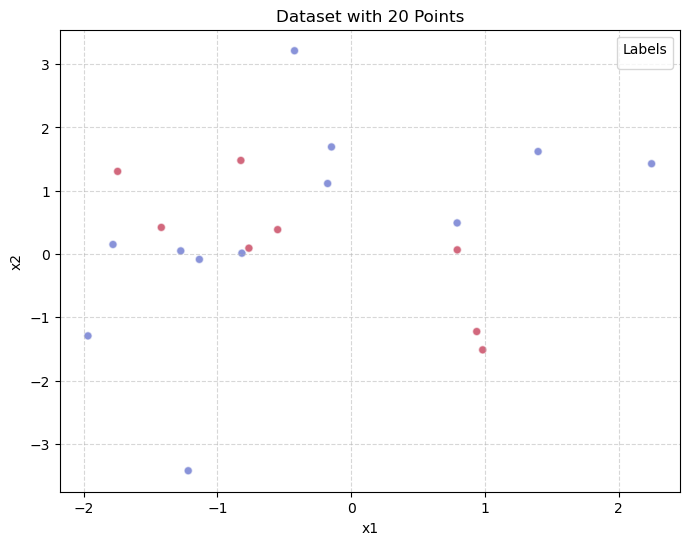

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


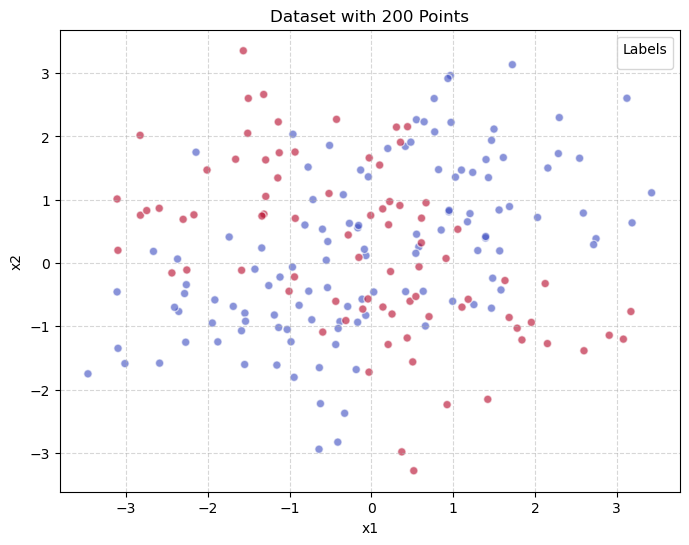

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


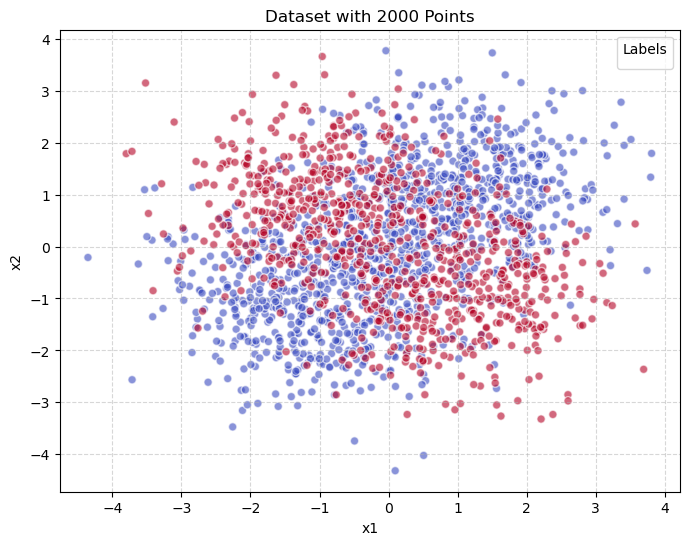

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


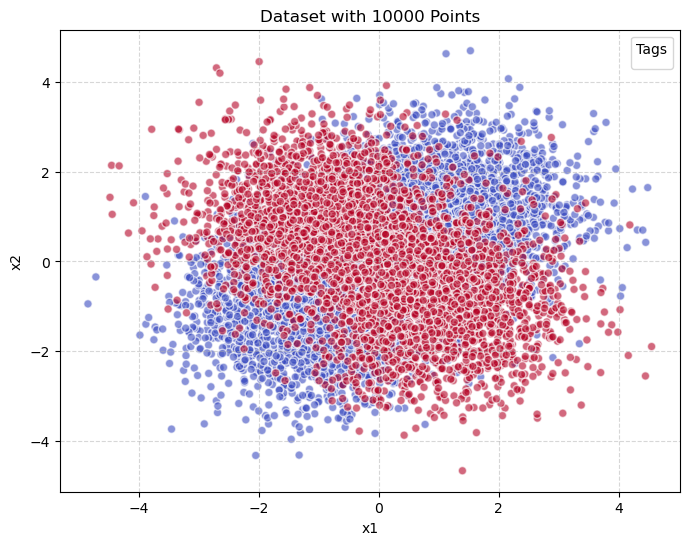

0         0.001000
1         0.001028
2         0.001057
3         0.001087
4         0.001117
          ...     
495     895.166472
496     920.296681
497     946.132376
498     972.693362
499    1000.000000
Name: gamma, Length: 500, dtype: float64


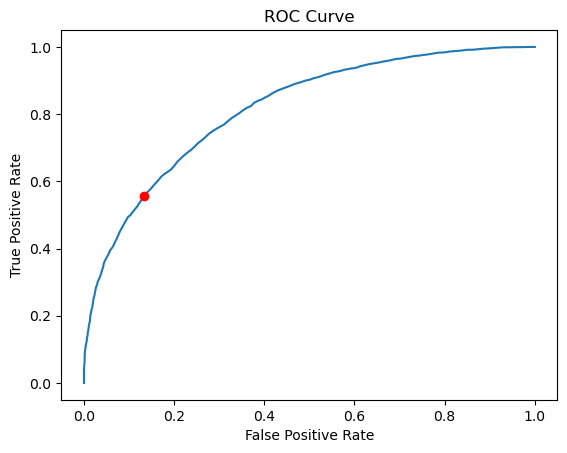

The minimum error is:  0.257
The gamma at the minimum error is:  1.7158089856100047
Acuracy:  0.7452


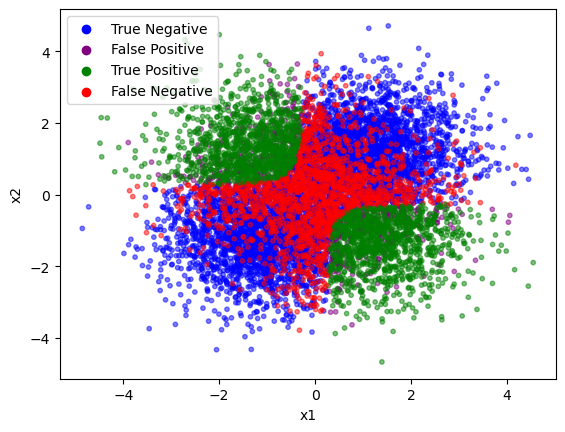

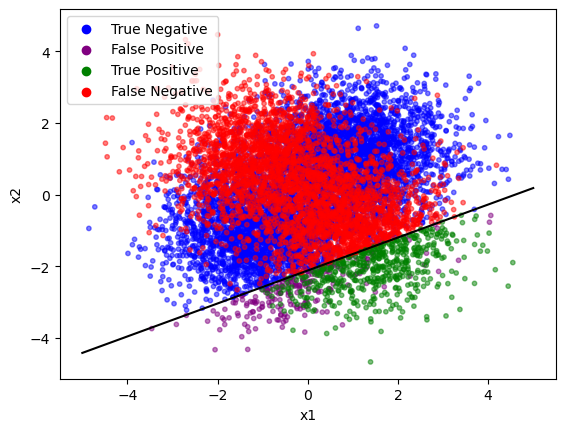

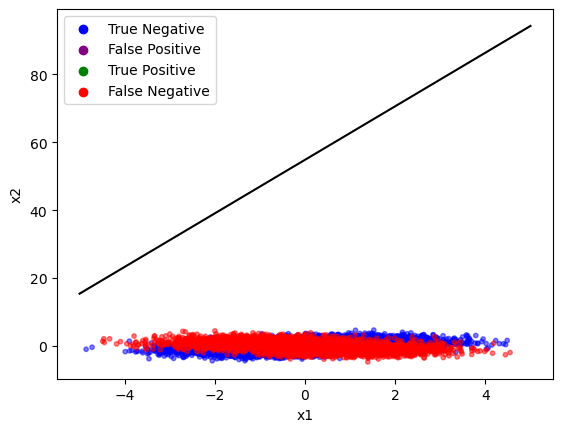

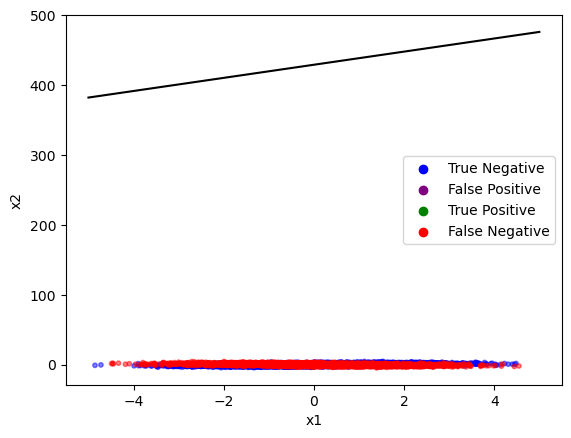

0.37039999999999995
0.4
0.4


In [41]:
mean01 = [-1, -1]
mean02 = [1, 1]
mean11 = [-1, 1]
mean12 = [1, -1]

cov = [[1, 0], [0, 1]]

p0 = 0.6
p1 = 0.4

generate_datasets(mean1=mean01, mean2=mean02, mean3=mean11, mean4=mean12, cov=cov, p0=p0, p1=p1)

d20 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train20.csv')
d200 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train200.csv')
d2000 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\train2000.csv')
d10000 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\validate10000.csv')



gammas = 10 ** np.linspace(-3, 3, 500)
results = []
# for gamma in gammas:
#     pred = classifier(d10000, mean01, mean02, mean11, mean12, cov, p0, p1, gamma)
#     false_positives_count = np.sum((pred['prediction'] == 1) & (pred['label'] == 0))
#     false_negatives_count = np.sum((pred['prediction'] == 0) & (pred['label'] == 1))
#     true_positive_count = np.sum((pred['prediction'] == 1) & (pred['label'] == 1))
#     print(false_positives_count, false_negatives_count)
#     results.append([false_positives_count, false_negatives_count, true_positive_count, gamma])

# results = np.array(results)
# write_data(pd.DataFrame(results, columns=['false_positives', 'false_negatives', 'true_positives', 'gamma']), r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\resultstest.csv')

results = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\resultstest.csv')
    
false_positives_rates = results['false_positives'] / 6000
false_negatives_rates = results['false_negatives'] / 4000
true_positives_rates = results['true_positives']  / 4000
gammas = results['gamma']

print(gammas)

min_error = min((results['false_positives'] + results['false_negatives']) / 10000)
min_error_index = np.argmin(results['false_positives'] + results['false_negatives'])
plt.plot(false_positives_rates, true_positives_rates)
plt.plot(false_positives_rates[min_error_index], true_positives_rates[min_error_index], 'ro')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\ROC Curve.png')
plt.show()

#plot the decision boundary
gamma_min_error = gammas[min_error_index]

print("The minimum error is: ", min_error)
print("The gamma at the minimum error is: ", gamma_min_error)
# theoretical gamma is 1.5


# classify the samples using the gamma at the minimum error
pred = classifier(d10000, mean01, mean02, mean11, mean12, cov, p0, p1, gamma_min_error)

pred['correct'] = pred['label'] == pred['prediction']

colors = np.where((pred['correct']) & (pred['label'] == 0), 'blue',
                np.where((~pred['correct']) & (pred['label'] == 0), 'purple',
        np.where((pred['correct']) & (pred['label'] == 1), 'green',
                        'red')))

plt.scatter(pred['x1'], pred['x2'], c=colors, s=10, alpha=0.5)
plt.scatter([], [], c='blue', label='True Negative')
plt.scatter([], [], c='purple', label='False Positive')
plt.scatter([], [], c='green', label='True Positive')
plt.scatter([], [], c='red', label='False Negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\accuracy.png')
print("Acuracy: ", metrics.accuracy_score(pred['label'], pred['prediction']))
plt.show()

#Part 2 A
#training logistic linear function based approximations 
#d20
X = d20[['x1', 'x2']].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]
y = d20['label'].to_numpy()
initial_w = np.zeros(3)
result = minimize(neg_log_likelihood, initial_w, args=(X, y), method='Nelder-Mead')
model20 = result.x

#d200
X = d200[['x1', 'x2']].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]
y = d200['label'].to_numpy()
initial_w = np.zeros(3)
result = minimize(neg_log_likelihood, initial_w, args=(X, y), method='Nelder-Mead')
model200 = result.x


#d2000
X = d2000[['x1', 'x2']].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]
y = d2000['label'].to_numpy()
initial_w = np.zeros(3)
result = minimize(neg_log_likelihood, initial_w, args=(X, y), method='Nelder-Mead')
model2000 = result.x




#applying model20 to the validation data
X_val = d10000[['x1', 'x2']].to_numpy()
X_val = np.c_[np.ones(X_val.shape[0]), X_val]
predictions20 = logistic_regression_predict(X_val, model20)

correct = d10000['label'] == predictions20

colors = np.where((correct) & (d10000['label'] == 0), 'blue',
                np.where((~correct) & (d10000['label'] == 0), 'purple',
        np.where((correct) & (d10000['label'] == 1), 'green',
                        'red')))

plt.scatter(d10000['x1'], d10000['x2'], c=colors, s=10, alpha=0.5)
#plot the logistic regression decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = -(model20[0] + model20[1] * x1) / model20[2]
plt.plot(x1, x2, 'k-')
plt.scatter([], [], c='blue', label='True Negative')
plt.scatter([], [], c='purple', label='False Positive')
plt.scatter([], [], c='green', label='True Positive')
plt.scatter([], [], c='red', label='False Negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\logistic regression decision boundary model20.png')
plt.show()


#applying model200 to the validation data
predictions200 = logistic_regression_predict(X_val, model200)

correct = d10000['label'] == predictions200

colors = np.where((correct) & (d10000['label'] == 0), 'blue',
                np.where((~correct) & (d10000['label'] == 0), 'purple',
        np.where((correct) & (d10000['label'] == 1), 'green',
                        'red')))

plt.scatter(d10000['x1'], d10000['x2'], c=colors, s=10, alpha=0.5)
#plot the logistic regression decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = -(model200[0] + model200[1] * x1) / model200[2]
mask = x2 > -5
x1 = x1[mask]
x2 = x2[mask]
plt.plot(x1, x2, 'k-')
plt.scatter([], [], c='blue', label='True Negative')
plt.scatter([], [], c='purple', label='False Positive')
plt.scatter([], [], c='green', label='True Positive')
plt.scatter([], [], c='red', label='False Negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\logistic regression decision boundary model200.png')
plt.show()
#applying model2000 to the validation data
predictions2000 = logistic_regression_predict(X_val, model2000)

correct = d10000['label'] == predictions2000

colors = np.where((correct) & (d10000['label'] == 0), 'blue',
                np.where((~correct) & (d10000['label'] == 0), 'purple',
        np.where((correct) & (d10000['label'] == 1), 'green',
                        'red')))

plt.scatter(d10000['x1'], d10000['x2'], c=colors, s=10, alpha=0.5)
#plot the logistic regression decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = -(model2000[0] + model2000[1] * x1) / model2000[2]
plt.plot(x1, x2, 'k-')
plt.scatter([], [], c='blue', label='True Negative')
plt.scatter([], [], c='purple', label='False Positive')
plt.scatter([], [], c='green', label='True Positive')
plt.scatter([], [], c='red', label='False Negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\logistic regression decision boundary mode2000.png')
plt.show()


print(1 - metrics.accuracy_score(d10000['label'], predictions20))
print(1 - metrics.accuracy_score(d10000['label'], predictions200))
print(1 - metrics.accuracy_score(d10000['label'], predictions2000))



C:\Users\anifa\AppData\Local\Temp\ipykernel_13124\1732910746.py:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * z - np.log(1 + np.exp(z)))
c:\ProgramData\miniconda3\envs\XR_Devices\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\anifa\AppData\Local\Temp\ipykernel_13124\1732910746.py:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * z - np.log(1 + np.exp(z)))
C:\Users\anifa\AppData\Local\Temp\ipykernel_13124\1732910746.py:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * z - np.log(1 + np.exp(z)))
c:\ProgramData\miniconda3\envs\XR_Devices\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\anifa\AppData\Local\Temp\ipykernel_13124\1732910746.py:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * z - np.log(1 + np.exp(z))

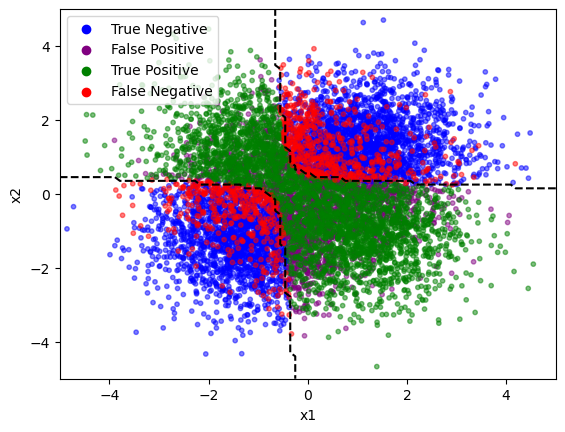

C:\Users\anifa\AppData\Local\Temp\ipykernel_13124\1901653744.py:89: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_mesh, x2_mesh, predictions_mesh, levels=[0], colors='k', linestyles='dashed', label='Decision Boundaries')


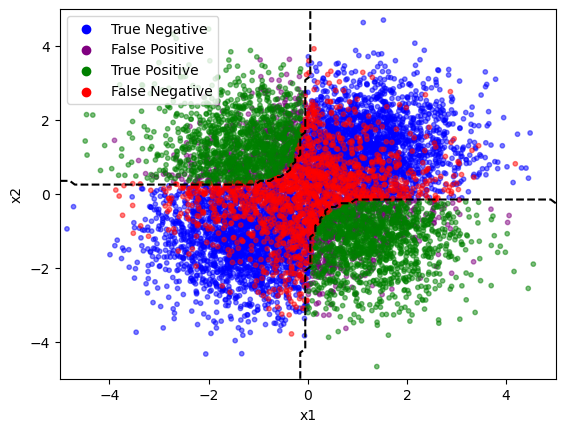

C:\Users\anifa\AppData\Local\Temp\ipykernel_13124\1901653744.py:122: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_mesh, x2_mesh, predictions_mesh, levels=[0], colors='k', linestyles='dashed', label='Decision Boundaries')


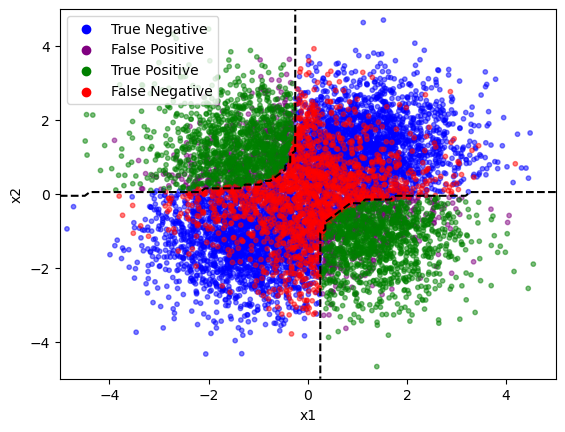

0.2933
0.2531
0.2521


In [42]:
#Part 2 B - using logistic quadratic function based approximations

#d20
X = d20[['x1', 'x2']].to_numpy()
X = np.c_[np.ones(X.shape[0]), X, X[:, 0] * X[:, 1], X[:, 0] ** 2, X[:, 1] ** 2]
y = d20['label'].to_numpy()
initial_w = np.zeros(6)

result = minimize(neg_log_likelihood, initial_w, args=(X, y), method='BFGS')

model20 = result.x

#d200
X = d200[['x1', 'x2']].to_numpy()
X = np.c_[np.ones(X.shape[0]), X, X[:, 0] * X[:, 1], X[:, 0] ** 2, X[:, 1] ** 2]
y = d200['label'].to_numpy()
initial_w = np.zeros(6)

result = minimize(neg_log_likelihood, initial_w, args=(X, y), method='BFGS')

model200 = result.x

#d2000
X = d2000[['x1', 'x2']].to_numpy()
X = np.c_[np.ones(X.shape[0]), X, X[:, 0] * X[:, 1], X[:, 0] ** 2, X[:, 1] ** 2]
y = d2000['label'].to_numpy()
initial_w = np.zeros(6)

result = minimize(neg_log_likelihood, initial_w, args=(X, y), method='BFGS')

model2000 = result.x

#apply the models to the validation data
X_val = d10000[['x1', 'x2']].to_numpy()
X_val = np.c_[np.ones(X_val.shape[0]), X_val, X_val[:, 0] * X_val[:, 1], X_val[:, 0] ** 2, X_val[:, 1] ** 2]
predictions20 = logistic_regression_predict(X_val, model20)

correct = d10000['label'] == predictions20

colors = np.where((correct) & (d10000['label'] == 0), 'blue',
                np.where((~correct) & (d10000['label'] == 0), 'purple',
        np.where((correct) & (d10000['label'] == 1), 'green',
                        'red')))

plt.scatter(d10000['x1'], d10000['x2'], c=colors, s=10, alpha=0.5)
#plot the logistic regression decision boundary
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
X_mesh = np.c_[np.ones(x1_mesh.ravel().shape[0]), x1_mesh.ravel(), x2_mesh.ravel(),
            x1_mesh.ravel() * x2_mesh.ravel(), x1_mesh.ravel() ** 2, x2_mesh.ravel() ** 2]
predictions_mesh = logistic_regression_predict(X_mesh, model20)
predictions_mesh = predictions_mesh.reshape(x1_mesh.shape)

# Plot the logistic regression decision boundary
plt.contour(x1_mesh, x2_mesh, predictions_mesh, levels=[0], colors='k', linestyles='dashed', label='Decision Boundaries')
plt.scatter([], [], c='blue', label='True Negative')
plt.scatter([], [], c='purple', label='False Positive')
plt.scatter([], [], c='green', label='True Positive')
plt.scatter([], [], c='red', label='False Negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\logistic regression decision boundary model20_B.png')
plt.show()


predictions200 = logistic_regression_predict(X_val, model200)

correct = d10000['label'] == predictions200

colors = np.where((correct) & (d10000['label'] == 0), 'blue',
                np.where((~correct) & (d10000['label'] == 0), 'purple',
        np.where((correct) & (d10000['label'] == 1), 'green',
                        'red')))

plt.scatter(d10000['x1'], d10000['x2'], c=colors, s=10, alpha=0.5)
#plot the logistic regression decision boundary
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
X_mesh = np.c_[np.ones(x1_mesh.ravel().shape[0]), x1_mesh.ravel(), x2_mesh.ravel(),
            x1_mesh.ravel() * x2_mesh.ravel(), x1_mesh.ravel() ** 2, x2_mesh.ravel() ** 2]
predictions_mesh = logistic_regression_predict(X_mesh, model200)
predictions_mesh = predictions_mesh.reshape(x1_mesh.shape)

# Plot the logistic regression decision boundary
plt.contour(x1_mesh, x2_mesh, predictions_mesh, levels=[0], colors='k', linestyles='dashed', label='Decision Boundaries')
plt.scatter([], [], c='blue', label='True Negative')
plt.scatter([], [], c='purple', label='False Positive')
plt.scatter([], [], c='green', label='True Positive')
plt.scatter([], [], c='red', label='False Negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\logistic regression decision boundary model200_B.png')
plt.show()


predictions2000 = logistic_regression_predict(X_val, model2000)

correct = d10000['label'] == predictions2000

colors = np.where((correct) & (d10000['label'] == 0), 'blue',
                np.where((~correct) & (d10000['label'] == 0), 'purple',
        np.where((correct) & (d10000['label'] == 1), 'green',
                        'red')))

plt.scatter(d10000['x1'], d10000['x2'], c=colors, s=10, alpha=0.5)
#plot the logistic regression decision boundary
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
X_mesh = np.c_[np.ones(x1_mesh.ravel().shape[0]), x1_mesh.ravel(), x2_mesh.ravel(),
            x1_mesh.ravel() * x2_mesh.ravel(), x1_mesh.ravel() ** 2, x2_mesh.ravel() ** 2]
predictions_mesh = logistic_regression_predict(X_mesh, model2000)
predictions_mesh = predictions_mesh.reshape(x1_mesh.shape)

# Plot the logistic regression decision boundary
plt.contour(x1_mesh, x2_mesh, predictions_mesh, levels=[0], colors='k', linestyles='dashed', label='Decision Boundaries')
plt.scatter([], [], c='blue', label='True Negative')
plt.scatter([], [], c='purple', label='False Positive')
plt.scatter([], [], c='green', label='True Positive')
plt.scatter([], [], c='red', label='False Negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 1\logistic regression decision boundary model2000_B.png')
plt.show()

print(1 - metrics.accuracy_score(d10000['label'], predictions20))
print(1 - metrics.accuracy_score(d10000['label'], predictions200))
print(1 - metrics.accuracy_score(d10000['label'], predictions2000))
